# PROBLEM 3 AND 4

In [1]:
#Importing libraries
import numpy as np
import cvxpy as cp
import scipy
import matplotlib.pyplot as plt

In [2]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']


In [3]:
#loading numpy arrays using the file path
Ainv=np.load('C:/Users/Prateek/Downloads/Group13/mdsg13/A_inv.npy')  
C=np.load('C:/Users/Prateek/Downloads/Group13/mdsg13/C.npy')
y=np.load('C:/Users/Prateek/Downloads/Group13/mdsg13/y.npy')
print(Ainv.shape)      
print(C.shape)
print(y.shape)

(10000, 10000)
(3000, 10000)
(3000,)


In [4]:
#Convex Optimization using cvxpy solver

s = cp.Variable(Ainv.shape[0])  #creating the independent variable
objective = cp.Minimize(cp.norm(s,1))  #our objective function
constraints = [y-C@s==0]   #constraints in our problem
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.OSQP,verbose=True)  #solve function finds the optimal value of s for which
                                         #objective gets minimized

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 02 08:22:48 PM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 02 08:22:48 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 02 08:22:48 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 02 08:22:48 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 02 08:22:48 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 02 08:22:48 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuff

88245.41192970132

In [8]:
np.save('C:/Users/Prateek/Downloads/Group13/dataforassignment/s.npy',s.value)
# op=np.load('C:/Users/Prateek/Downloads/Group13/dataforassignment/s.npy')

In [5]:
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio

def dct2(x): #functions for discrete cosine transform and inverse-dct
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

In [9]:
op=s.value  #s.value gives us the optimal s computed by the optimizer
a=list(op)   
a=np.array(a)
#print(type(a))
sresh=np.reshape(a,(100,100)) #reshaping s into image size

In [10]:
arec=idct2(sresh) #computing idct of s
print(arec.shape) # where s is the sparse representation of x(image)

(100, 100)


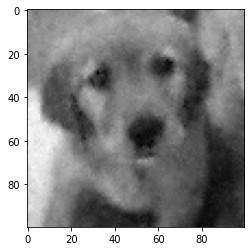

In [13]:
plt.imshow(arec.T,cmap='gray') #reconstructed image
plt.imsave('C:/Users/Prateek/Downloads/Group13/mdsg13/complete.png', arec.T,cmap='gray')

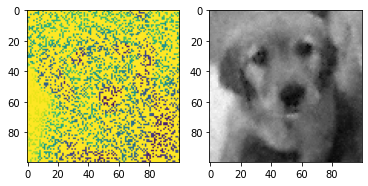

In [12]:
pathincomplete='C:/Users/Prateek/Downloads/Group13/mdsg13/incomplete.png'
plt.subplot(1,2,1)
plt.imshow(imageio.imread(pathincomplete,as_gray=False, pilmode="RGB"))
plt.subplot(1,2,2)
plt.imshow(arec.T,cmap='gray') #comparison of reconstructed and incomplete image